In [57]:
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
import os
import shutil

In [58]:
PREFIX = "example_data" 
data_dir = "example_data/"
output_dir = "outputs" 
os.makedirs(output_dir, exist_ok=True)

In [59]:
sampleinfo = pd.read_csv(f"{data_dir}{PREFIX}.tsv", sep="\t")
sample_to_pop = dict(zip(list(sampleinfo["Sample name"]), list(sampleinfo["Population code"])))
samples = [line.split()[0] for line in open(f"{data_dir}{PREFIX}.fam", "r").readlines()]
pops = [sample_to_pop.get(item, "NA") for item in samples]

In [61]:
# Define the prefix for your file
 # Replace this with your actual prefix

# Loop over the values of K
for K in [3,5]:
    # Construct the command to run
    cmd = f"./admixture --cv {data_dir}{PREFIX}.bed {K}"
    
    # Execute the command and capture the output
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    # Decode and print the output to console
    print(stdout.decode())
    print(stderr.decode())
    
    files = [f"{PREFIX}.{K}.P", f"{PREFIX}.{K}.Q"]
    out_files = [f"admixture.{K}.P", f"admixture.{K}.Q"]
    
    for old,new in zip(files,out_files):
        if os.path.exists(old):
            shutil.move(old, os.path.join(output_dir, new))

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 462x26499
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 6.312	Loglikelihood: -6.08554e+06	(delta): 1.36179e+07
2 (EM) 	Elapsed: 6.417	Loglikelihood: -5.8064

In [62]:
# Loop over the values of K
for K in [3,5]:
    # Construct the command to run
    cmd = f"neural-admixture train --k {K} --data_path {data_dir}{PREFIX}.bed --save_dir {output_dir} --name neural_admixture --max_epochs 500 --seed 43 --initialization pcarchetypal"
    
    # Execute the command and capture the output
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    # Decode and print the output to console
    print(stdout.decode())
    print(stderr.decode())

INFO:neural_admixture.entry:Neural ADMIXTURE - Version 1.4.0
INFO:neural_admixture.entry:[CHANGELOG] Mean imputation for missing data was added in version 1.4.0. To reproduce old behaviour, please use `--imputation zero` when invoking the software.
INFO:neural_admixture.entry:[CHANGELOG] Default P initialization was changed to 'pckmeans' in version 1.3.0.
INFO:neural_admixture.entry:[CHANGELOG] Warmup training for initialization of Q was added in version 1.3.0 to improve training stability (only for `pckmeans`).
INFO:neural_admixture.entry:[CHANGELOG] Convergence check changed so it is performed after 15 epochs in version 1.3.0 to improve training stability.
INFO:neural_admixture.entry:[CHANGELOG] Default learning rate was changed to 1e-5 instead of 1e-4 in version 1.3.0 to improve training stability.
INFO:neural_admixture.src.utils:Reading data...
INFO:neural_admixture.src.snp_reader:Input format is BED.
INFO:neural_admixture.src.utils:Data contains 462 samples and 26499 SNPs.
INFO:ne

INFO:neural_admixture.entry:Neural ADMIXTURE - Version 1.4.0
INFO:neural_admixture.entry:[CHANGELOG] Mean imputation for missing data was added in version 1.4.0. To reproduce old behaviour, please use `--imputation zero` when invoking the software.
INFO:neural_admixture.entry:[CHANGELOG] Default P initialization was changed to 'pckmeans' in version 1.3.0.
INFO:neural_admixture.entry:[CHANGELOG] Warmup training for initialization of Q was added in version 1.3.0 to improve training stability (only for `pckmeans`).
INFO:neural_admixture.entry:[CHANGELOG] Convergence check changed so it is performed after 15 epochs in version 1.3.0 to improve training stability.
INFO:neural_admixture.entry:[CHANGELOG] Default learning rate was changed to 1e-5 instead of 1e-4 in version 1.3.0 to improve training stability.
INFO:neural_admixture.src.utils:Reading data...
INFO:neural_admixture.src.snp_reader:Input format is BED.
INFO:neural_admixture.src.utils:Data contains 462 samples and 26499 SNPs.
INFO:ne

## Plots

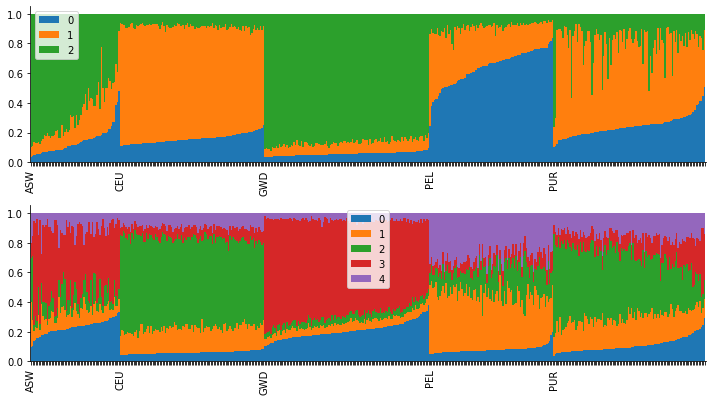

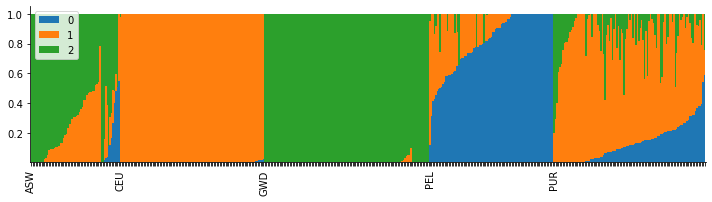

In [64]:
#neural admixture
fig = plt.figure()
fig.set_size_inches((10, 8))

plotind = 1
for K in [3,5]:
    ax = fig.add_subplot(3, 1, plotind)
    
#     data = pd.DataFrame(Q_new)
    data = pd.read_csv("outputs/neural_admixture.%s.Q"%K, delim_whitespace=True, header=None)
    cols = list(data.columns)
    data["sample"] = samples
    data["pop"] = pops
    data = data.sort_values(["pop"]+cols)
    data.plot.bar(stacked=True, ax=ax, width=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Only plot label for first sample in each pop
    xticklabels = []
    currpop = ""
    for i in range(data.shape[0]):
        if data["pop"].values[i] == currpop:
            xticklabels.append("")
        else:
            xticklabels.append(data["pop"].values[i])
            currpop = data["pop"].values[i]
    ax.set_xticklabels(xticklabels)
    
    plotind += 1
fig.tight_layout()

#Admixture

fig = plt.figure()
fig.set_size_inches((10, 8))

plotind = 1
for K in [3]:
    ax = fig.add_subplot(3, 1, plotind)
    
#     data = pd.DataFrame(Q_new)
    data = pd.read_csv("outputs/admixture.%s.Q"%K, delim_whitespace=True, header=None)
    cols = list(data.columns)
    data["sample"] = samples
    data["pop"] = pops
    data = data.sort_values(["pop"]+cols)
    data.plot.bar(stacked=True, ax=ax, width=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    # Only plot label for first sample in each pop
    xticklabels = []
    currpop = ""
    for i in range(data.shape[0]):
        if data["pop"].values[i] == currpop:
            xticklabels.append("")
        else:
            xticklabels.append(data["pop"].values[i])
            currpop = data["pop"].values[i]
    ax.set_xticklabels(xticklabels)
    
    plotind += 1
fig.tight_layout()

## Benchmarking runtime and memory

In [ ]:
for K in [3,5]:
    # Construct the command to run
    cmd = f"/usr/bin/time -al -p neural-admixture train --k {K} --data_path {data_dir}{PREFIX}.bed --save_dir {output_dir} --name neural_admixture --max_epochs 500 --seed 43 --initialization pcarchetypal"
    
    # Execute the command and capture the output
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    # Decode and print the output to console
    print(stdout.decode())
    print(stderr.decode())

In [ ]:
for K in [3,5]:
    # Construct the command to run
    cmd = f"/usr/bin/time -al -p ./admixture --cv {data_dir}{PREFIX}.bed {K}"
    
    # Execute the command and capture the output
    process = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout, stderr = process.communicate()
    
    # Decode and print the output to console
    print(stdout.decode())
    print(stderr.decode())
    
    files = [f"{PREFIX}.{K}.P", f"{PREFIX}.{K}.Q"]
    out_files = [f"admixture.{K}.P", f"admixture.{K}.Q"]
    
    for old,new in zip(files,out_files):
        if os.path.exists(old):
            shutil.move(old, os.path.join(output_dir, new))

peak memomy admix 81.10 mb neural 1836.12mb
ram 82 mb 814 mb
